                                        Titanic Survival Prediction - Machine Learning Project

The titanic Dataset Contains the information about the passengers. The goal is to predict whether a passenger survived or not based on the features like the age, gender ticket class etc. 

Basically,  this is a project of binary classification.  

0 refers to that the paseenger did not survive.  
1 refers to that the passenger did survive. 

The dataset consist of the features like the: 
1. Passenger ID 
2. Pclass 
3. Sex 
4. Age
5. Sibsp (which means of siblings or of spouses)  
6. Parch (of parents/children) 
7. Fare 
8. embarked 
9. Survived (whether the person survived or not) 

In [2]:
# Importinng all the libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
# importing the titanic dataset 
df = pd.read_csv("Titanic_Dataset.csv") 
df 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In the above code, we can see that the dataset has got implanted by  the code. Now we see that how the furhter analysis can be made and the ML algorithms can be applied. 

### Important to note:  
Embarked column is given here to show that Parch columsn is by the Parents and Columns. Parch = parents/Children. 
It tells that how manny of the parents or the children of the passengers were travelling ith them on the Titanic. 

Parch is an important factor as the passengers travelling with the family often  got responsibilities and more emotional support and hence thay have a better chacne of survival and hence parch is a strong survuval indicator. 

Embraked means the port or the city from which the passengers boarded the Titanic. The embarked values mean that, for example: 
  
   C   :   Cherboung  : France 
   Q   :   Queenstown  : Ireland 
   S   :    Southampton :  England  

Why is embarked animportant feature ? 
Differnt poorta had different ticket classes and different socio economic status and different cabin locations.  Hence, this effects the survival possibility.   

## For Example 
   Chernbourg passenger : more first class higher chances of survival 
   Southampton passenger : more third class which means lower chances of survival 

In [4]:
# now, we have to find the missing values in the data analysis.  
df.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here, in the above code as we can see that in the dataset, age has around 177 empty spaces, cabin column has 687 blank columns and also Embarked has around 2 blank spaces. 

So, basically we have to do the data processing and hence we have to fill the missing values by fillna operation and also we have to drop the unnecessary columns which will not be used for prediction. 

In [5]:
# filling of the missing values 
df['Age'].fillna(df['Age'].mean(), inplace = True)  

C:\Users\91981\AppData\Local\Temp\ipykernel_33904\1613892050.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace = True)


In [6]:
# Filling of the missing values in the embarked places 
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)  

C:\Users\91981\AppData\Local\Temp\ipykernel_33904\1292557865.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)


Now, we have to drop the unnecessary columns which are not useful for the predictions of the dataset like Passenger Id, Name, Ticket and the cabin. 

In [7]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis =  1, inplace = True) 
df  

# Here, we have removed all the unnecessary data columns 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


Now, we will convert the categorical variables and then we will convert the  categorical values into the numerical values. 

In [8]:
numerical = df.drop(['Sex', 'Embarked'], axis= 1) 
numerical 

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.000000,1,0,7.2500
1,1,1,38.000000,1,0,71.2833
2,1,3,26.000000,0,0,7.9250
3,1,1,35.000000,1,0,53.1000
4,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000
887,1,1,19.000000,0,0,30.0000
888,0,3,29.699118,1,2,23.4500
889,1,1,26.000000,0,0,30.0000


In [9]:
categorical = df.filter(['Sex', 'Embarked'], axis = 1) 
categorical 

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [10]:
# Conversion of the categorical to numerical data 
cat_numerical = pd.get_dummies(categorical, drop_first = True).astype(int) 
cat_numerical 

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1
...,...,...,...
886,1,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [11]:
# Nowe, we concatenate the whole data 
df2 = pd.concat([numerical, cat_numerical], axis = 1) 
df2   

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,1,0,1
1,1,1,38.000000,1,0,71.2833,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,1
887,1,1,19.000000,0,0,30.0000,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0


So, as we can see that the above dataset is the final data which will now be used for making the predictions and the applications of all the Machine Learning Algorithms. 

In [12]:
# Dividing into the features and labels 
x= df2.drop(['Survived'], axis = 1)  
x 

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,1,0,1
1,1,38.000000,1,0,71.2833,0,0,0
2,3,26.000000,0,0,7.9250,0,0,1
3,1,35.000000,1,0,53.1000,0,0,1
4,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1,0,1
887,1,19.000000,0,0,30.0000,0,0,1
888,3,29.699118,1,2,23.4500,0,0,1
889,1,26.000000,0,0,30.0000,1,0,0


In [13]:
y = df.filter(['Survived'], axis = 1) 
y  
# This is the survived column 

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [14]:
# We have to apply the train test and split on the model 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.20) 

In [15]:
x_train # data on which the model is trained 

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
331,1,45.500000,0,0,28.5000,1,0,1
733,2,23.000000,0,0,13.0000,1,0,1
382,3,32.000000,0,0,7.9250,1,0,1
704,3,26.000000,1,0,7.8542,1,0,1
813,3,6.000000,4,2,31.2750,0,0,1
...,...,...,...,...,...,...,...,...
106,3,21.000000,0,0,7.6500,0,0,1
270,1,29.699118,0,0,31.0000,1,0,1
860,3,41.000000,2,0,14.1083,1,0,1
435,1,14.000000,1,2,120.0000,0,0,1


In [16]:
x_test # The data on which the model is tested 

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
709,3,29.699118,1,1,15.2458,1,0,0
439,2,31.000000,0,0,10.5000,1,0,1
840,3,20.000000,0,0,7.9250,1,0,1
720,2,6.000000,0,1,33.0000,0,0,1
39,3,14.000000,1,0,11.2417,0,0,0
...,...,...,...,...,...,...,...,...
433,3,17.000000,0,0,7.1250,1,0,1
773,3,29.699118,0,0,7.2250,1,0,0
25,3,38.000000,1,5,31.3875,0,0,1
84,2,17.000000,0,0,10.5000,0,0,1


In [17]:
y_train 
# data on which the model is trained 

,Survived
331,0
733,0
382,0
704,0
813,0
...,...
106,1
270,0
860,0
435,1


In [18]:
y_test # Data on which the model is tested 

,Survived
709,1
439,0
840,0
720,1
39,1
...,...
433,0
773,0
25,1
84,1


In [19]:
# Applying the feature scaling on the dataset to make the data uniform and also to make the model perform better 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 

x_train =  sc.fit_transform(x_train) 
x_test = sc.transform(x_test)  

Now, for here sice this is a classifcation roblem, we use the Random Forest classification to make the predictions  and also the probability 

In [20]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(random_state = 42, n_estimators = 500)  

classifier = model.fit(x_train, y_train) 
classifier 

c:\Users\91981\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [21]:
y_pred  =classifier.predict(x_test) 
y_pred 

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1])

In [22]:
y_prob = classifier.predict_proba(x_test)[:,1] 
y_prob 

array([0.3102    , 0.0655    , 0.0863    , 0.95      , 0.308     ,
       0.972     , 0.8335262 , 0.076     , 0.73645317, 0.946     ,
       0.436     , 0.08933333, 0.028     , 0.002     , 0.22844762,
       0.938     , 0.246     , 0.96427112, 0.042     , 0.04      ,
       0.008     , 0.49793333, 0.134     , 0.00133333, 0.02      ,
       0.058     , 0.18966667, 0.12203333, 0.202     , 0.50766667,
       0.01566667, 0.7       , 0.71      , 0.605     , 0.32737143,
       0.1502    , 0.572     , 0.8335262 , 0.85      , 0.        ,
       0.06466667, 0.17      , 0.        , 0.12717112, 0.304     ,
       0.074     , 0.47134286, 0.004     , 0.332     , 0.392     ,
       0.88      , 0.95      , 0.014     , 0.792     , 0.01144444,
       0.938     , 0.08756667, 0.902     , 0.928     , 0.44571429,
       0.29233333, 0.928     , 0.93      , 0.09933333, 0.12717112,
       0.968     , 0.087     , 0.1403    , 0.212     , 0.956     ,
       0.972     , 0.918     , 0.712     , 0.986     , 0.024  

Now, after making all the predictions, we have to calculate the accuracy score, confusion matrix, classification report and the roc auc score 

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score 

print("Accuracy Score: \n", accuracy_score(y_test, y_pred)) 

print("The Classification Report:\n", classification_report(y_test, y_pred)) 

print("The confusion Matrix:\n", confusion_matrix(y_test, y_pred)) 

print("ROC AUC Score: ", roc_auc_score(y_test, y_prob))  

#Here as we can see that the model accuracy is being showna around 81% 

Accuracy Score: 
 0.8100558659217877
The Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

The confusion Matrix:
 [[90 15]
 [19 55]]
ROC AUC Score:  0.8875160875160876


So, here as we can see above that all the analysis has been done and hence now for making the analysis more understandable, we will plot some graphs. 

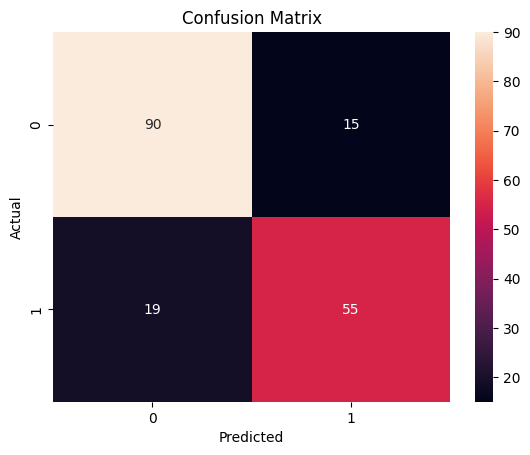

In [24]:
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
import seaborn as sns 

cm = confusion_matrix(y_test, y_pred) 

plt.figure() 
sns.heatmap(cm, annot = True, fmt = 'd') 

plt.xlabel("Predicted") 
plt.ylabel("Actual") 

plt.title("Confusion Matrix") 
plt.show() 

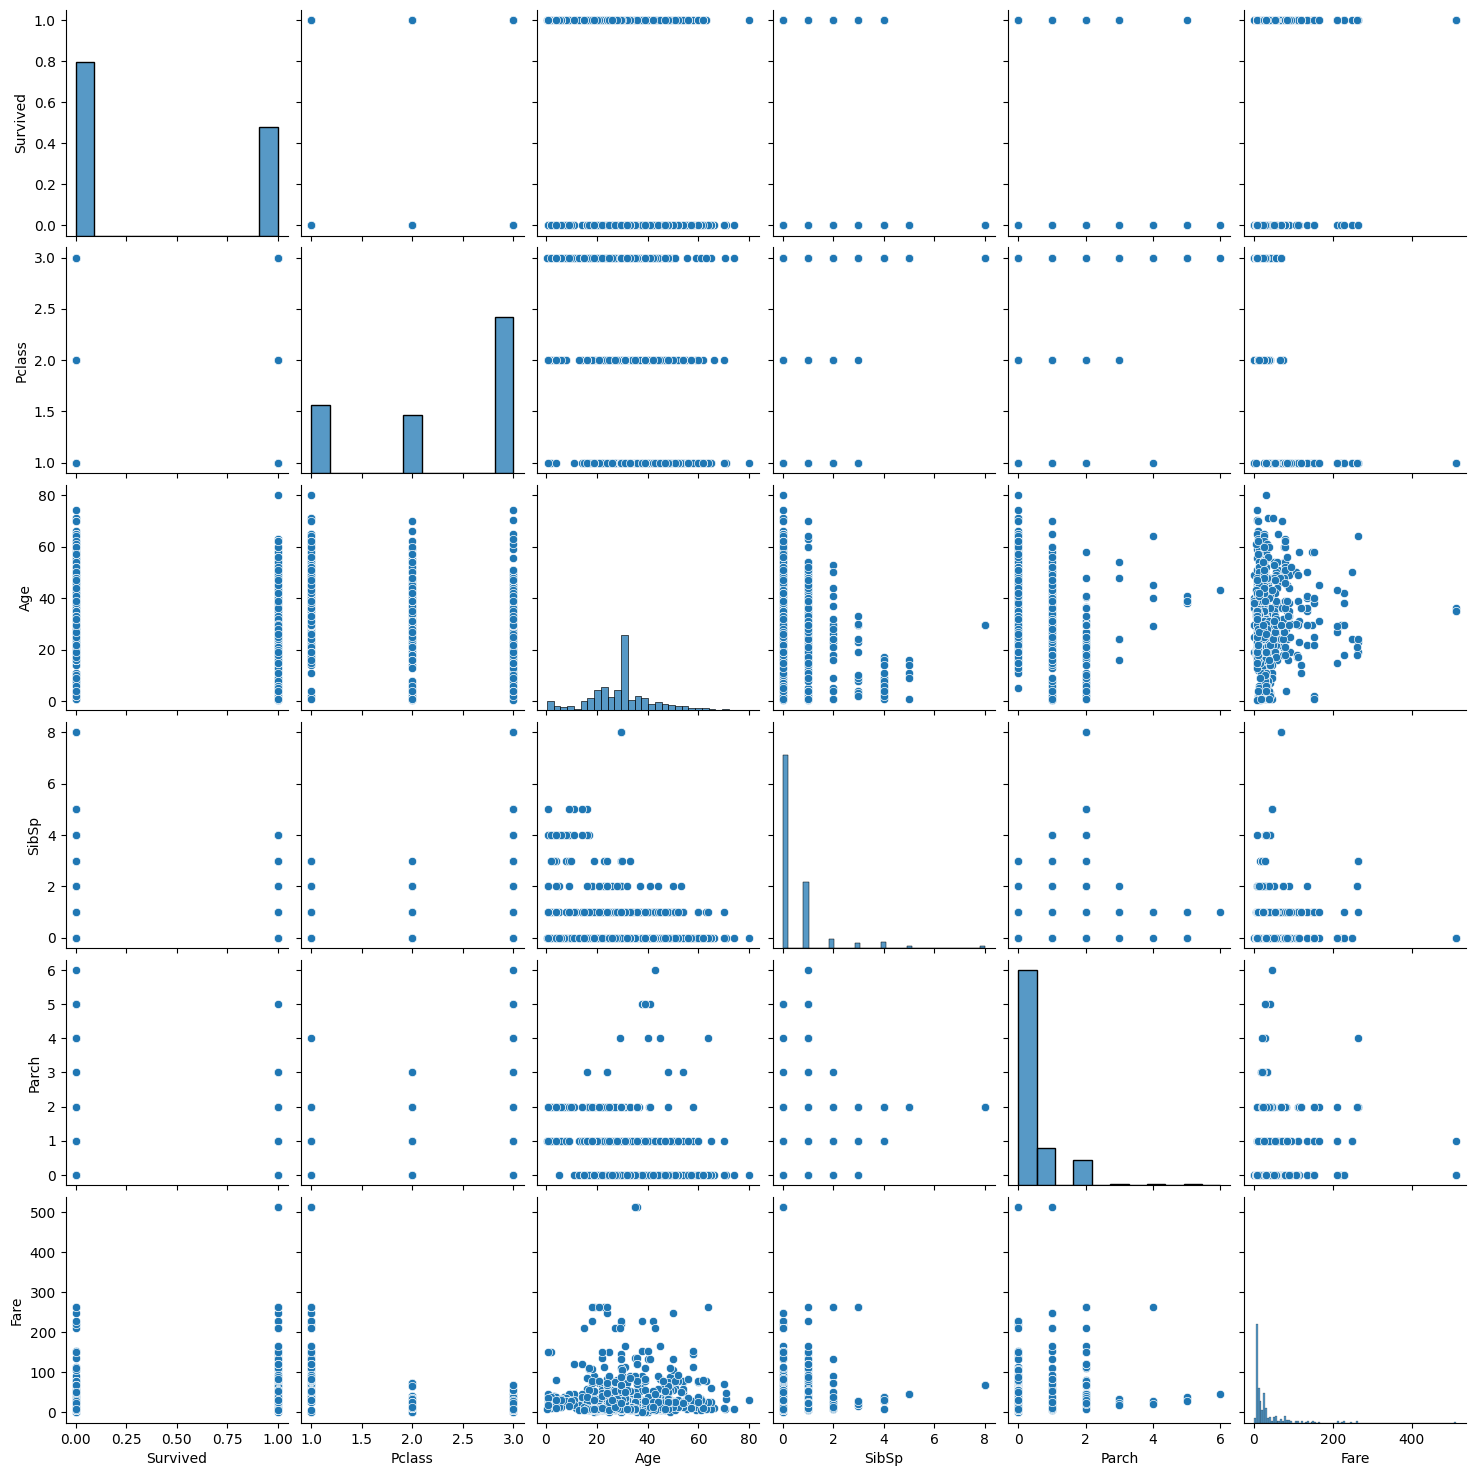

In [25]:
sns.pairplot(df) 

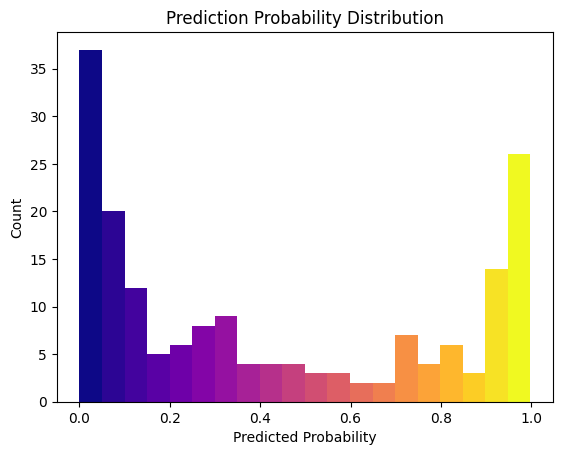

In [26]:
# Now, we plot a  histogram of the  Prediction probability distribution   
import numpy as np  
y_prob = classifier.predict_proba(x_test)[:,1] 

plt.figure() 
counts, bins, patches = plt.hist(y_prob, bins = 20) 
plt.xlabel("Predicted Probability") 
plt.ylabel("Count")

colors = plt.cm.plasma(np.linspace(0,1, len(patches))) 

for patch, color in zip(patches, colors): 
    patch.set_facecolor(color) 

plt.title("Prediction Probability Distribution") 


plt.show() 

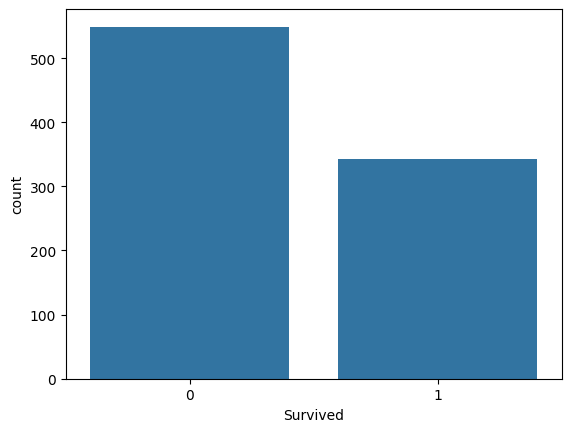

In [27]:
# Plotting the survival count 
sns.countplot(x ='Survived', data = df2) 
plt.show() 

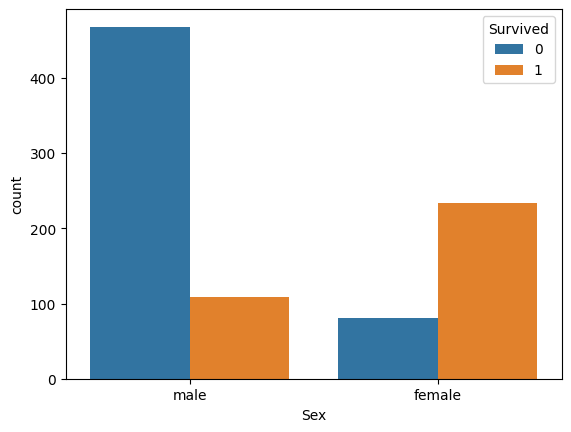

In [28]:
# countlpot of survival by gender 
sns.countplot(x = 'Sex', hue = 'Survived', data = df) 
plt.show() 

                                                Predcition sto be done by the ML Model 
     So, here as we can see that the Ml Model trained above can  make predictions also after making all teh observations 

In [29]:
df2.iloc[100]  

Survived       0.0000
Pclass         3.0000
Age           28.0000
SibSp          0.0000
Parch          0.0000
Fare           7.8958
Sex_male       0.0000
Embarked_Q     0.0000
Embarked_S     1.0000
Name: 100, dtype: float64

In [30]:
single_record = sc.transform(x.values[100].reshape(1,-1)) 

predicted_outcome = classifier.predict(single_record) 

print(predicted_outcome)  

# Here as we cna see that the predicted outcome is found correct 

[0]


c:\Users\91981\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


                                                        Example 

In [45]:
example = pd.DataFrame( {"Pclass" : [2], "Age" : [30], "SibSp": [3],
    "Parch": [1],
    "Fare": [9.9],
    "Sex_male": [0.000],
    "Embarked_Q": [0],
    "Embarked_S" : [1],  })  

example 

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,2,30,3,1,9.9,0.0,0,1


In [46]:
example = sc.transform(example)

prediction = classifier.predict(example)
probability = classifier.predict_proba(example)[:, 1]

print("Example of Survival Prediction\n")

print(
    "Predicted Outcome:",
    "Survived" if prediction == 1 else "Did not Survive"
)

print("Probability of survival:", round(probability[0], 2)) 

print(f"Percentage of Survival: {(probability[0])*100}") 


Example of Survival Prediction

Predicted Outcome: Survived
Probability of survival: 0.78
Percentage of Survival: 78.0


                                                                  Example 2

In [47]:
example2 = pd.DataFrame( {"Pclass" : [3], "Age" : [50], "SibSp": [4],
    "Parch": [2],
    "Fare": [51.0],
    "Sex_male": [0.000],
    "Embarked_Q": [0],
    "Embarked_S" : [1],  })  

example2

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,50,4,2,51.0,0.0,0,1


In [48]:
example2 = sc.transform(example2)

prediction = classifier.predict(example2)
probability = classifier.predict_proba(example2)[:, 1]

print("Example of Survival Prediction\n")

print(
    "Predicted Outcome:",
    "Survived" if prediction == 1 else "Did not Survive"
)

print("Probability of survival:", round(probability[0], 2)) 

print(f"Percentage of Survival: {(probability[0]) * 100}") 


Example of Survival Prediction

Predicted Outcome: Did not Survive
Probability of survival: 0.27
Percentage of Survival: 27.0
